# Lab - Flights Data Exploration 

In this Lab you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [68]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. This is a sample solution.

## Data Cleaning

### Deal with null values
- Identify any null or missing data 
- Impute appropriate replacement values.

Hint: Remember to use the definitions to understand what each column means!

#### Find missing values

In [69]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

Ci sono valori mancanti nella colonna DepDelay15. Vediamo come riempire questi valori.

#### Replace missing values

Sappiamo che DepDelay15 è un indicatore boolean quindi i valori sono solo 0 o 1.

Controllo come sono fatti i dati rispetto alla colonna DepDelay.

In [70]:
df_DepDelay15_null = df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]
df_DepDelay15_null

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [71]:
df_DepDelay15_null.describe()

,DepDelay,DepDel15
count,2761.0,0.0
mean,0.0,NaN
std,0.0,NaN
min,0.0,NaN
25%,0.0,NaN
50%,0.0,NaN
75%,0.0,NaN
max,0.0,NaN


In [72]:
# riempimento rispetto a quanto analizzato:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)

#riempimento alternativo:
df_flights.DepDel15 = df_flights.DepDel15.fillna(df_flights.DepDelay > 15)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### Deal with outliers
- Find mean, median, mode, maximum and minimum for **DepDelay** and **ArrDelay** columns.
- Plot the distribution for these 2 columns. You can do either a histogram, a boxplot or both.
- Use these to identify any outliers in the data.
- Re-adjust the data so that it doesn't contain these outliers.

Hints: 
- There is no perfect re-adjusment, don't obsess over it!
- Your re-adjustment should look like a normal distribution!

In [73]:
depDelay_mean = df_flights.DepDelay.mean()
depDelay_med = df_flights.DepDelay.median()
depDelay_mode = df_flights.DepDelay.mode()[0]
depDelay_max = df_flights.DepDelay.max()
depDelay_min = df_flights.DepDelay.min()
arrDelay_mean = df_flights.ArrDelay.mean()
arrDelay_med = df_flights.ArrDelay.median()
arrDelay_mode = df_flights.ArrDelay.mode()[0]
arrDelay_max = df_flights.ArrDelay.max()
arrDelay_min = df_flights.ArrDelay.min()

DepDelay 
Min:-63
Max:1425
Median:-1.0
Mean:10.350448628373906
ArrDelay 
Min:-75
Max:1440
Median:-3.0
Mean:6.496649996322718


C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_8960\3410384018.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_8960\3410384018.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


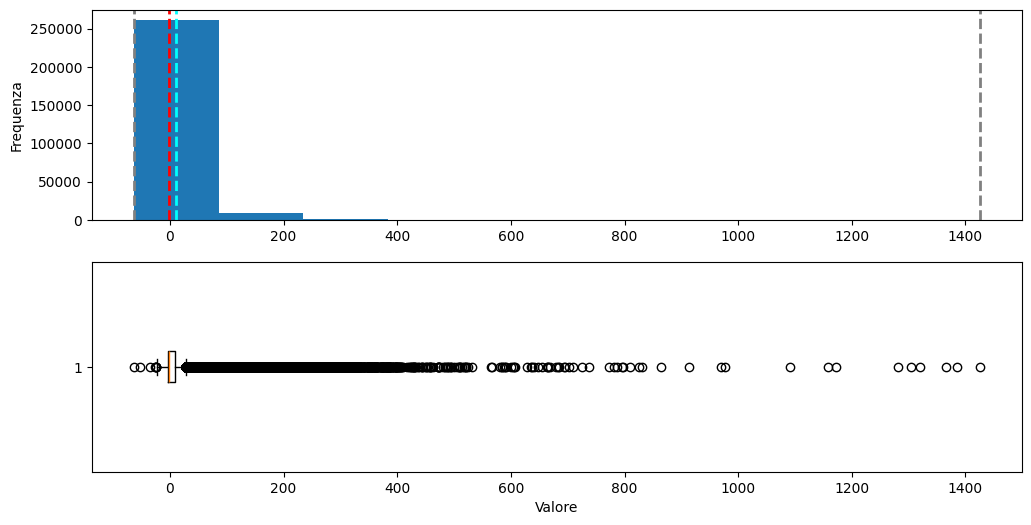

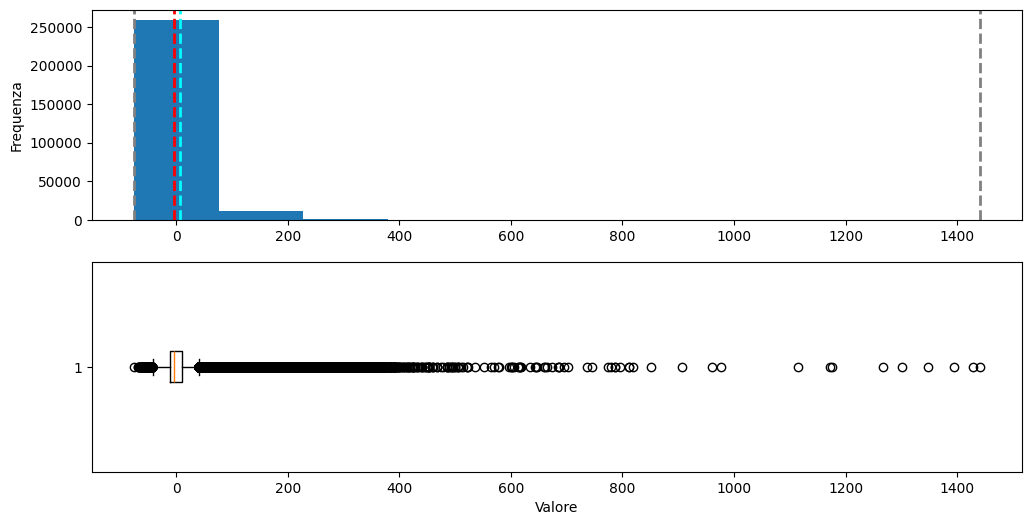

In [74]:
#plot distribuzione
import matplotlib.pyplot as plt
def show_distribution(col:pd.Series):
    
    delay_mean = col.mean()
    delay_med = col.median()
    # delay_mode = col.mode()[0]
    delay_max = col.max()
    delay_min = col.min()
    print(col.name, '\nMin:{}\nMax:{}\nMedian:{}\nMean:{}'.format(delay_min, delay_max, delay_med, delay_mean))

    fig, ax = plt.subplots(2, 1, figsize=(12,6))
    
    ax[0].hist(col)
    ax[0].set_ylabel('Frequenza')
    
    ax[0].axvline(x=delay_min, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=delay_mean, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=delay_med, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=delay_max, color = 'gray', linestyle='dashed', linewidth = 2)

    ax[1].boxplot(col, vert=False) #vert=False ruota il boxplot
    ax[1].set_xlabel('Valore')

    fig.show()

delay_fields = ['DepDelay', 'ArrDelay']
for col in delay_fields:
    show_distribution(df_flights[col])

Dobbiamo rimuovere i dati "outlier" per non avere problemi.

Useremo solo i dati tra il primo e il 90esimo quantile.

In [75]:
perc01 = df_flights['DepDelay'].quantile(.01)
perc90 = df_flights['DepDelay'].quantile(.9)

df_flights = df_flights[df_flights['DepDelay'] > perc01]
df_flights = df_flights[df_flights['DepDelay'] < perc90]

perc01 = df_flights['ArrDelay'].quantile(.01)
perc90 = df_flights['ArrDelay'].quantile(.9)

df_flights = df_flights[df_flights['ArrDelay'] > perc01]
df_flights = df_flights[df_flights['ArrDelay'] < perc90]


DepDelay 
Min:-11
Max:36
Median:-2.0
Mean:-0.13045221445221444
ArrDelay 
Min:-32
Max:16
Median:-6.0
Mean:-5.680522144522144


C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_8960\3410384018.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_8960\3410384018.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


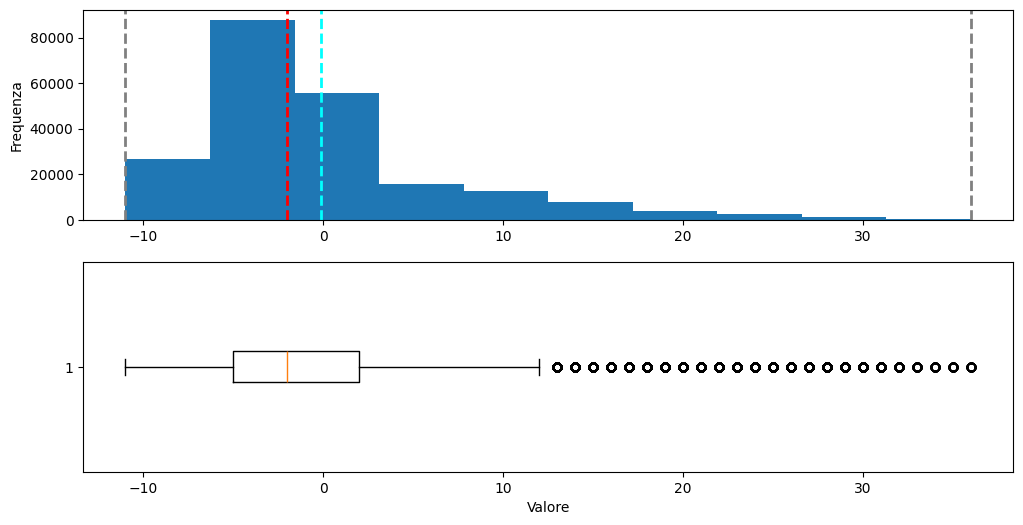

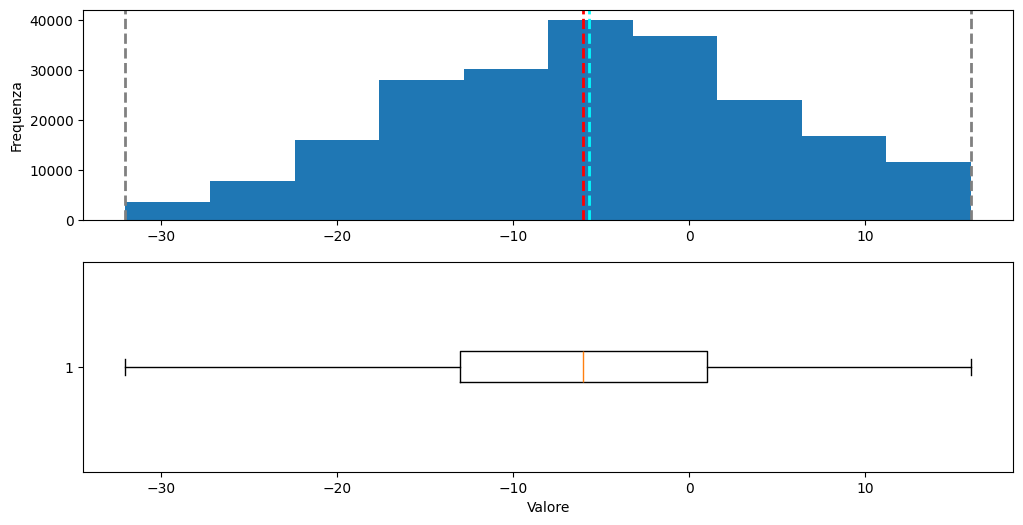

In [76]:

# for col in delay_fields:
#     show_distribution(df_flights[col])
show_distribution(df_flights['DepDelay'])
show_distribution(df_flights['ArrDelay'])

## Information extraction

Use statistics, aggregate functions, and visualizations to answer the following questions:
- What are the average (mean) departure and arrival delays?
- How do the carriers compare in terms of arrival delay performance?
- Is there a noticable difference in arrival delays for different days of the week?
- Which departure airport has the highest average departure delay?
- Do **late** departures tend to result in longer arrival delays than on-time departures?
- Which route (from origin airport to destination airport) has the most **late** arrivals?
- Which route has the highest average arrival delay?

In [77]:
# cominciamo con descrivere i dati:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214500.0,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000
mean,2013.0,7.027296,15.799389,3.904168,12755.329371,12734.206438,1284.230942,-0.130452,0.057604,1465.878522,-5.680522,0.032597,0.013305
std,0.0,2.006267,8.853235,1.998344,1512.139480,1506.103555,470.230018,7.260672,0.232993,487.646410,10.188473,0.177579,0.114579
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,853.000000,-5.000000,0.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-2.000000,0.000000,1448.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1658.000000,2.000000,0.000000,1850.000000,1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,16.000000,1.000000,1.000000


### What are the average (mean) departure and arrival delays?

In [78]:
df_flights[delay_fields].mean()

DepDelay   -0.130452
ArrDelay   -5.680522
dtype: float64

### How do the carriers compare in terms of arrival delay performance?

<Axes: title={'center': 'ArrDelay'}, xlabel='Carrier'>

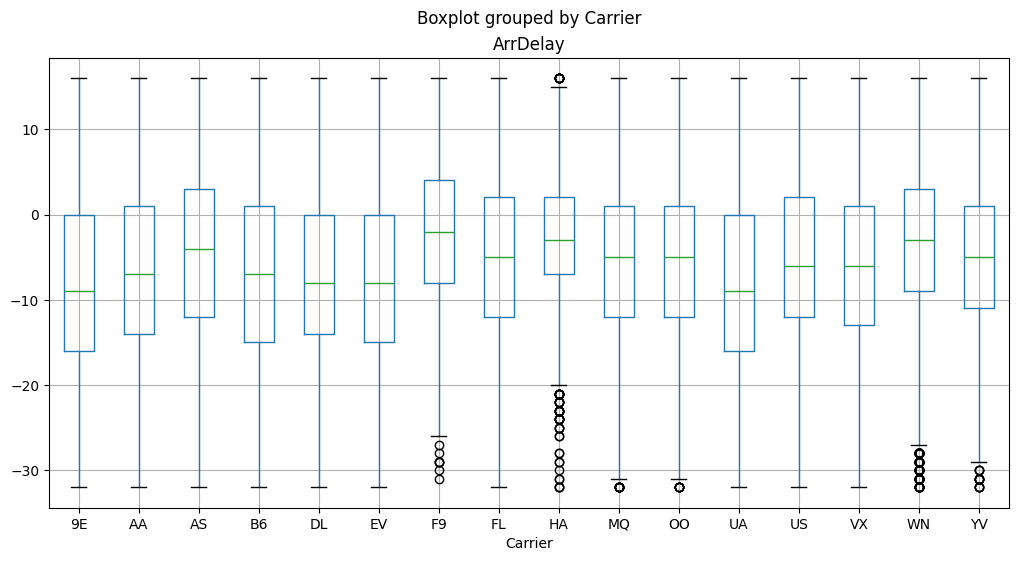

In [79]:
df_flights.boxplot(column='ArrDelay', by='Carrier', figsize=(12,6))

### Is there a noticable difference in arrival delays for different days of the week?

<Axes: title={'center': 'ArrDelay'}, ylabel='DayOfWeek'>

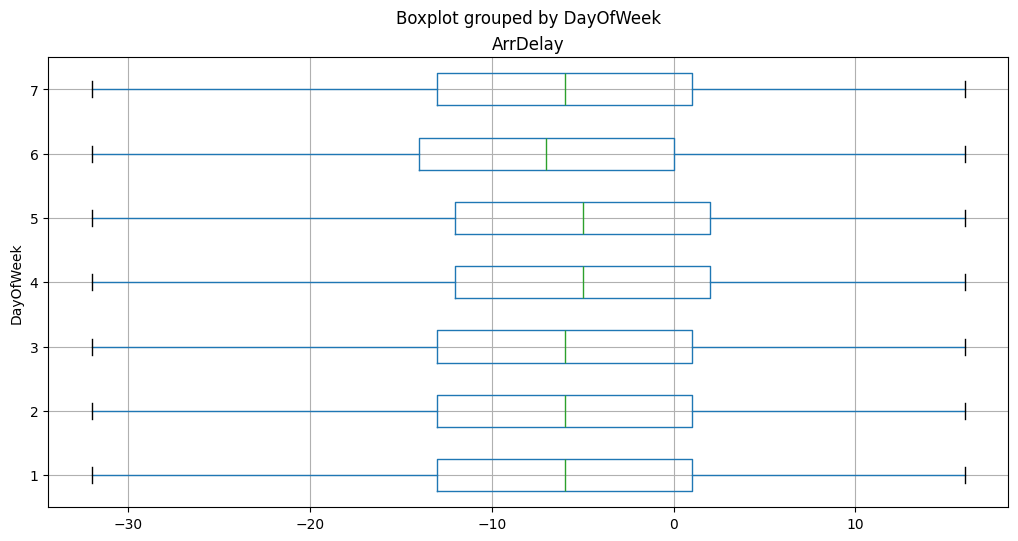

In [80]:
df_flights.boxplot(column='ArrDelay', by='DayOfWeek', figsize=(12,6), vert=False)

### Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,3.865294
Dallas Love Field,3.039141
William P Hobby,2.706247
Denver International,1.863804
Baltimore/Washington International Thurgood Marshall,1.805401
...,...
Tucson International,-2.522114
Richmond International,-2.665944
Ted Stevens Anchorage International,-2.886700


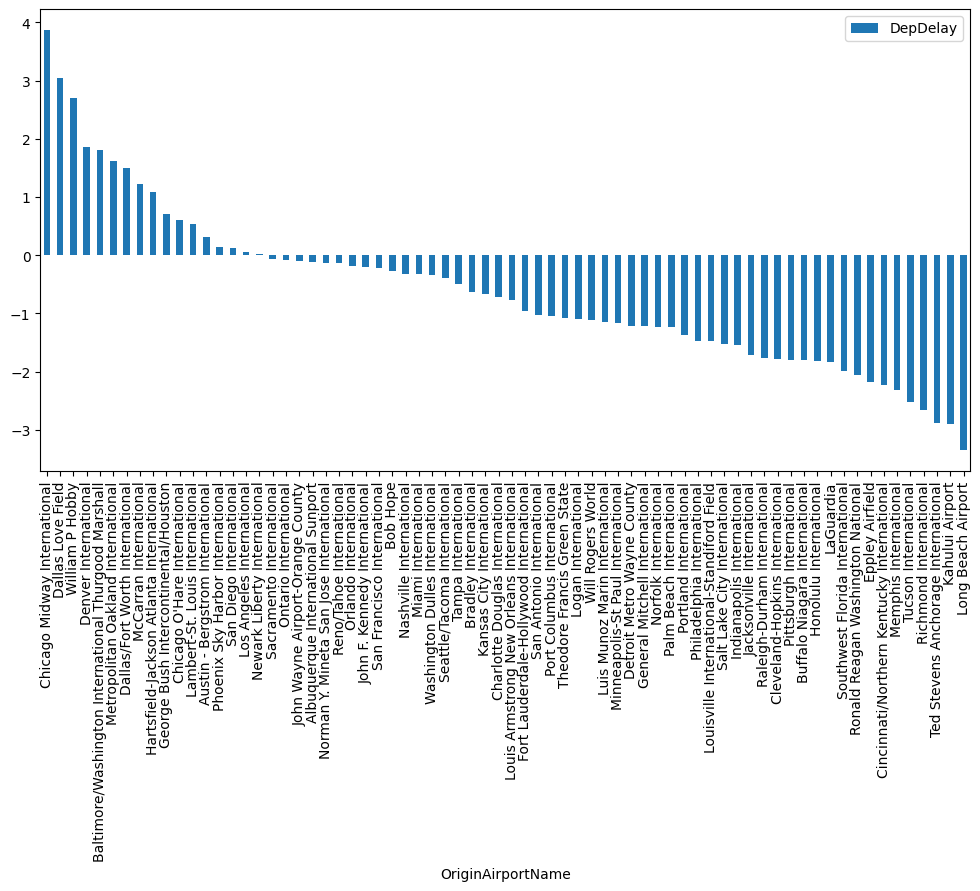

In [81]:
df_dep_airport_group = df_flights.groupby(df_flights.OriginAirportName)
df_dep_airport_mean = pd.DataFrame(df_dep_airport_group.DepDelay.mean()).sort_values('DepDelay', ascending=False)
df_dep_airport_mean.plot(kind='bar', figsize=(12,6))
df_dep_airport_mean

### Do **late** departures tend to result in longer arrival delays than on-time departures?

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

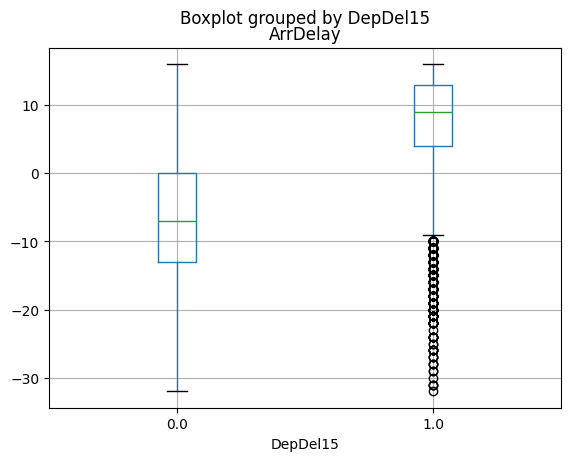

In [82]:
df_flights.boxplot(column='ArrDelay', by='DepDel15')

### Which route (from origin airport to destination airport) has the most **late** arrivals?


In [83]:
# aggiungo una nuova colonna con il volo
route = pd.Series(df_flights['OriginAirportName'] + '>' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, route.rename('Route')], axis=1)

In [84]:
#raggruppo per Route
route_group = df_flights.groupby(df_flights['Route'])

route_delay = route_group['ArrDel15'].sum()
#ordinamento
pd.DataFrame(route_delay).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International>Los Angeles International,67
Los Angeles International>San Francisco International,42
Detroit Metro Wayne County>Chicago O'Hare International,29
LaGuardia>Logan International,29
LaGuardia>Chicago O'Hare International,27
...,...
Norman Y. Mineta San Jose International>Honolulu International,0
Norman Y. Mineta San Jose International>Hartsfield-Jackson Atlanta International,0
Norman Y. Mineta San Jose International>George Bush Intercontinental/Houston,0


### Which route has the highest average arrival delay?

In [85]:
#analogo alla domanda precedente, solo con la media
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Theodore Francis Green State>Southwest Florida International,12.000000
Charlotte Douglas International>General Mitchell International,10.000000
Indianapolis International>Philadelphia International,10.000000
Port Columbus International>Logan International,7.000000
Cleveland-Hopkins International>Philadelphia International,7.000000
...,...
Lambert-St. Louis International>Cleveland-Hopkins International,-20.000000
Jacksonville International>Chicago Midway International,-20.000000
Eppley Airfield>LaGuardia,-20.750000
